In [93]:
import os
import bz2
import time
import json
from tqdm import tqdm
import pandas as pd

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# Define the path to the directory: in this case, Journal de Geneve
NEWSPAPER_FOLDER = 'collections'

data = []

# To get the total number of bz2 files beforehand (for accurate progress bar)
total_files = sum(1 for _, _, filenames in os.walk(NEWSPAPER_FOLDER) for f in filenames if f.endswith('.csv'))

i = 0
# Walk through the directory
file_time_start = time.time()
for dirpath, dirnames, filenames in os.walk(NEWSPAPER_FOLDER):
    for filename in tqdm(filenames, total=total_files, desc="Reading files"):
        # Check if the file has a .bz2 extension
        if filename.endswith('.csv'):
            filepath = os.path.join(dirpath, filename)    
            fichier = pd.read_csv(filepath, sep= ";")
            fichier['filename'] = filename
            data.append(fichier)

    print(f'Number of files in {dirpath}: {len(filenames)}. Time taken to read files: {time.time() - file_time_start}')

data = pd.concat(data)

Reading files: 17it [00:00, 112.96it/s]                                                                                                                                                                                                                                            

Number of files in collections: 17. Time taken to read files: 0.1533341407775879


In [ ]:
len(data)

In [94]:
data.head()

uid  type language                    title  size  \
0  JDG-1882-09-01-a-i0001   NaN       fr                    SUSSE  4435   
1  JDG-1902-09-06-a-i0042   NaN       fr       DERNIÈRESJ1ÉPÊCHES   593   
0  LLE-1893-11-18-a-i0007   NaN       fr  L'EXPOSITION DE CHICAGO  1379   
0  IMP-1929-08-17-a-i0004   NaN       fr   AU PIED OU CA\TO€.lMIE  1880   
0  IMP-1935-07-22-a-i0090   NaN       fr                Çn Suisse   605   

  country newspaper             issue pages  nb_pages  ...  \
0      CH       JDG  JDG-1882-09-01-a   1,2         2  ...   
1      CH       JDG  JDG-1902-09-06-a     3         1  ...   
0      CH       LLE  LLE-1893-11-18-a     3         1  ...   
0      CH       IMP  IMP-1929-08-17-a     1         1  ...   
0      CH       IMP  IMP-1935-07-22-a     8         1  ...   

   [total:1,available:100]  [total:3,available:100]  \
0                      NaN                      NaN   
1                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   

   [total:114,available:200] [total:1629,available:1700]  \
0                        NaN                         NaN   
1                        NaN                         NaN   
0                        NaN                         NaN   
0                        NaN                         NaN   
0                        NaN                         NaN   

  [total:87,available:100] [total:10,available:100] [total:33,available:100]  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   

  [total:137,available:200] [total:5,available:100] [total:135,available:200]  
0                       NaN                     NaN                       NaN  
1                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  

[5 rows x 33 columns]

In [103]:
data.columns

Index(['uid', 'type', 'language', 'title', 'size', 'country', 'newspaper',
       'issue', 'pages', 'nb_pages', 'relevance', 'year', 'is_on_front',
       'date', 'persons_mentioned', 'locations_mentioned', 'content',
       'access_right', 'content_provider', 'is_content_available',
       'collections', '[total:2,available:100]', 'filename',
       '[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]',
       '[total:87,available:100]', '[total:10,available:100]',
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]'],
      dtype='object')

In [104]:
data = data.drop(['[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]', 'content_provider', 
       '[total:87,available:100]', '[total:10,available:100]', 'is_content_available', 'access_right', 
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]', '[total:2,available:100]'], axis=1)

In [107]:
data = data.drop(['type'], axis=1)

In [115]:
data = data.drop(['collections'], axis=1)

In [112]:
data = data.drop(['relevance'], axis=1)

In [116]:
data.columns

Index(['uid', 'language', 'title', 'size', 'country', 'newspaper', 'issue',
       'pages', 'nb_pages', 'year', 'is_on_front', 'date', 'persons_mentioned',
       'locations_mentioned', 'content', 'filename', 'glacier'],
      dtype='object')

In [119]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier  
0        Rhone  
1        Rhone  
0  Grindelwald  
0      Arpette  
0         Pers

In [110]:
data['glacier'] = data['filename'].apply(lambda filename: filename[0].upper() + filename[1:-4])

In [160]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier                                       cleaned_text  
0        Rhone  susse gek eve septembre 1882 bulletin politiqu...  
1        Rhone  dernièresj épêches suisse berne double suicide...  
0  Grindelwald  lexposition chicago chicago oclobre 1893 archi...  
0      Arpette  pied lmie notes easra promeneur cliampex comme...  
0         Pers  suisse fête musiques ouvrières fribourg samedi...

In [120]:
import re
data['year'] = data['uid'].apply(lambda x: int(re.search(r'\d{4}', x).group()) if re.search(r'\d{4}', x) else None)

In [ ]:
len(data)

In [154]:
data.dropna(subset=['content'], inplace=True)

In [ ]:
len(data)

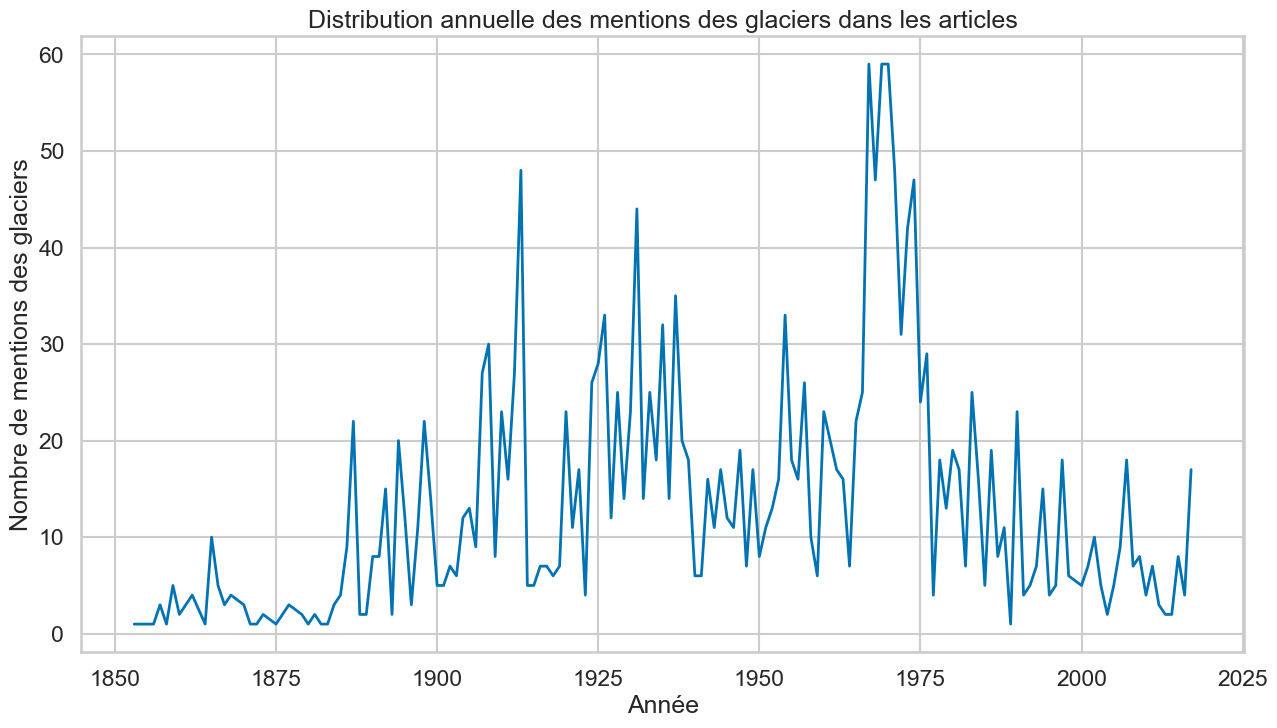

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.)

# Group the data by 'year' and count the number of entries
data_sorted = data.groupby('year').size()

sns.set_palette("colorblind")

# Create the line plot with sorted data
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=data_sorted, linewidth=2)
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de mentions des glaciers')
ax.set_title('Distribution annuelle des mentions des glaciers dans les articles')

plt.show()


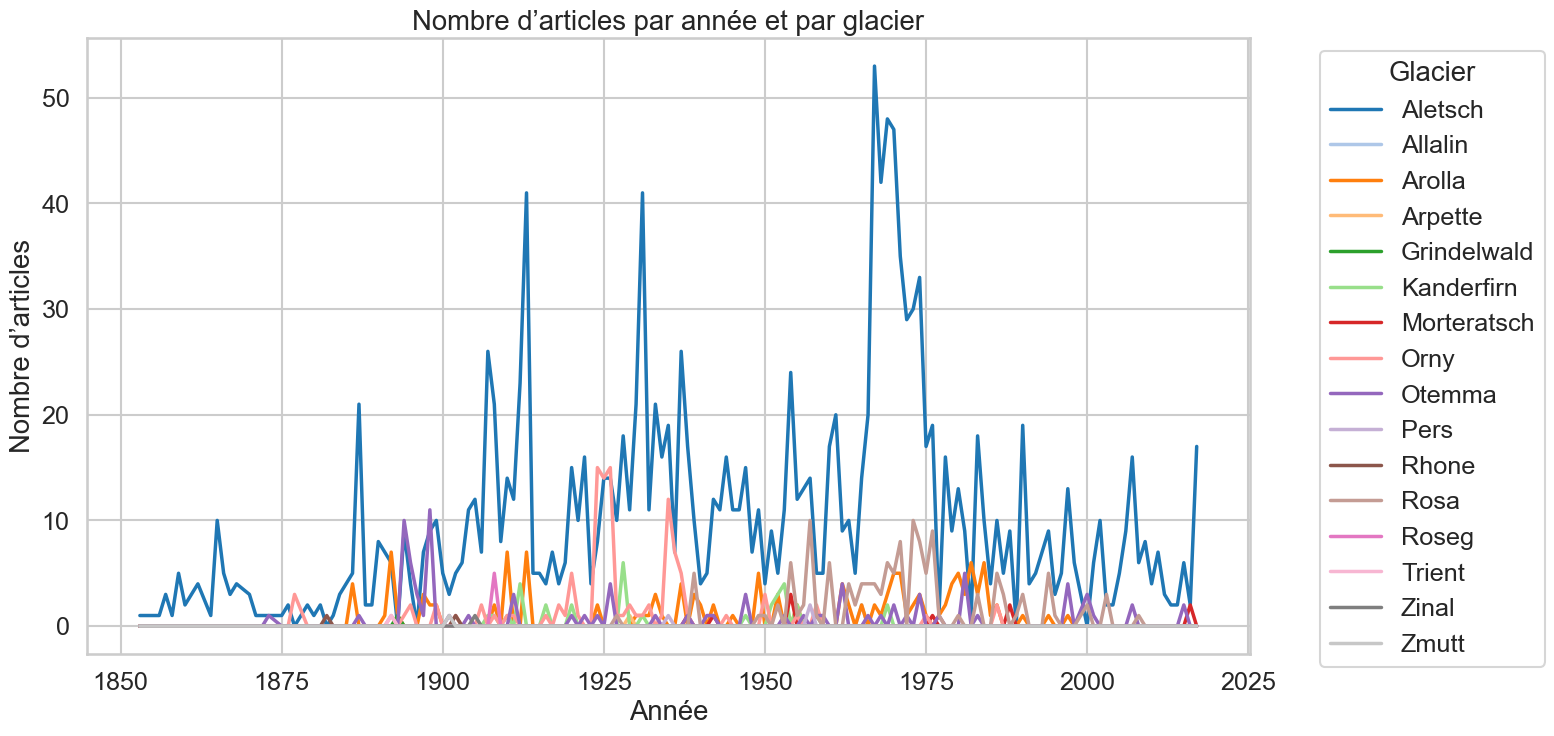

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.1)

no_glaciers = data['glacier'].unique()

# Group the data by 'year' and 'glacier' and count the number of articles
grouped_data = data.groupby(['year', 'glacier']).size().reset_index(name='number_of_articles')

# Pivot the data to get counts of articles per year for each glacier
pivot_data = grouped_data.pivot(index='year', columns='glacier', values='number_of_articles').fillna(0)

# Manually create a palette with 16 distinct colors
palette = sns.color_palette("tab20", n_colors=no_glaciers)

# Create the line plot for each glacier
plt.figure(figsize=(15, 8))
for i, glacier in enumerate(pivot_data.columns):
    sns.lineplot(data=pivot_data[glacier], label=glacier, color=palette[i % no_glaciers], linewidth=2.5)

plt.xlabel('Année')
plt.ylabel('Nombre d’articles')
plt.title('Nombre d’articles par année et par glacier')
plt.legend(title='Glacier', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


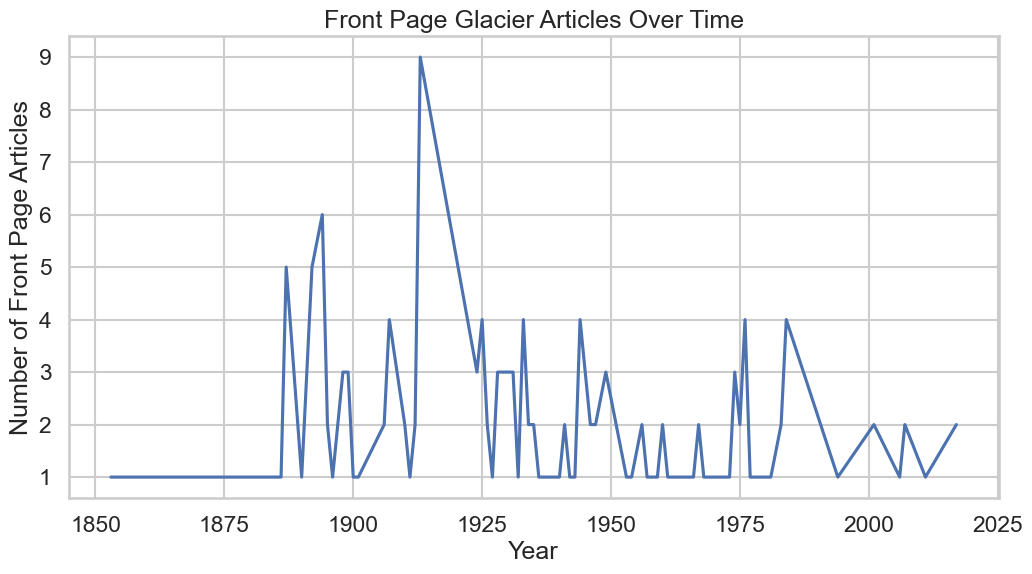

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1)

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front']]

# Group by year and count
front_page_counts = front_page_articles.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=front_page_counts)
plt.title('Front Page Glacier Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Front Page Articles')
plt.show()


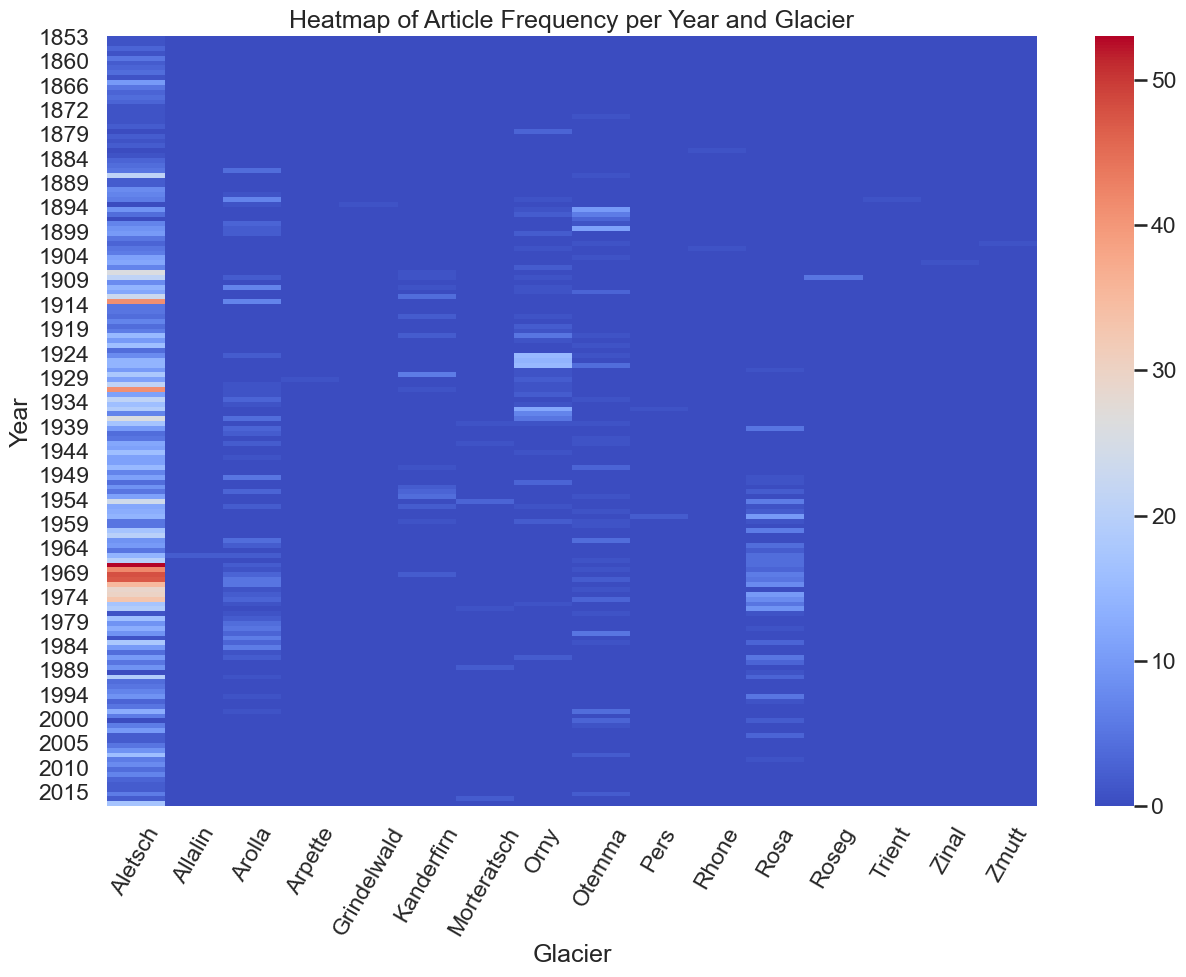

In [219]:
# Group by year and glacier, then count occurrences
article_counts = data.groupby(['year', 'glacier']).size().reset_index(name='count')

# Pivot for heatmap
pivot_data = article_counts.pivot(index='year', columns='glacier', values='count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Article Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


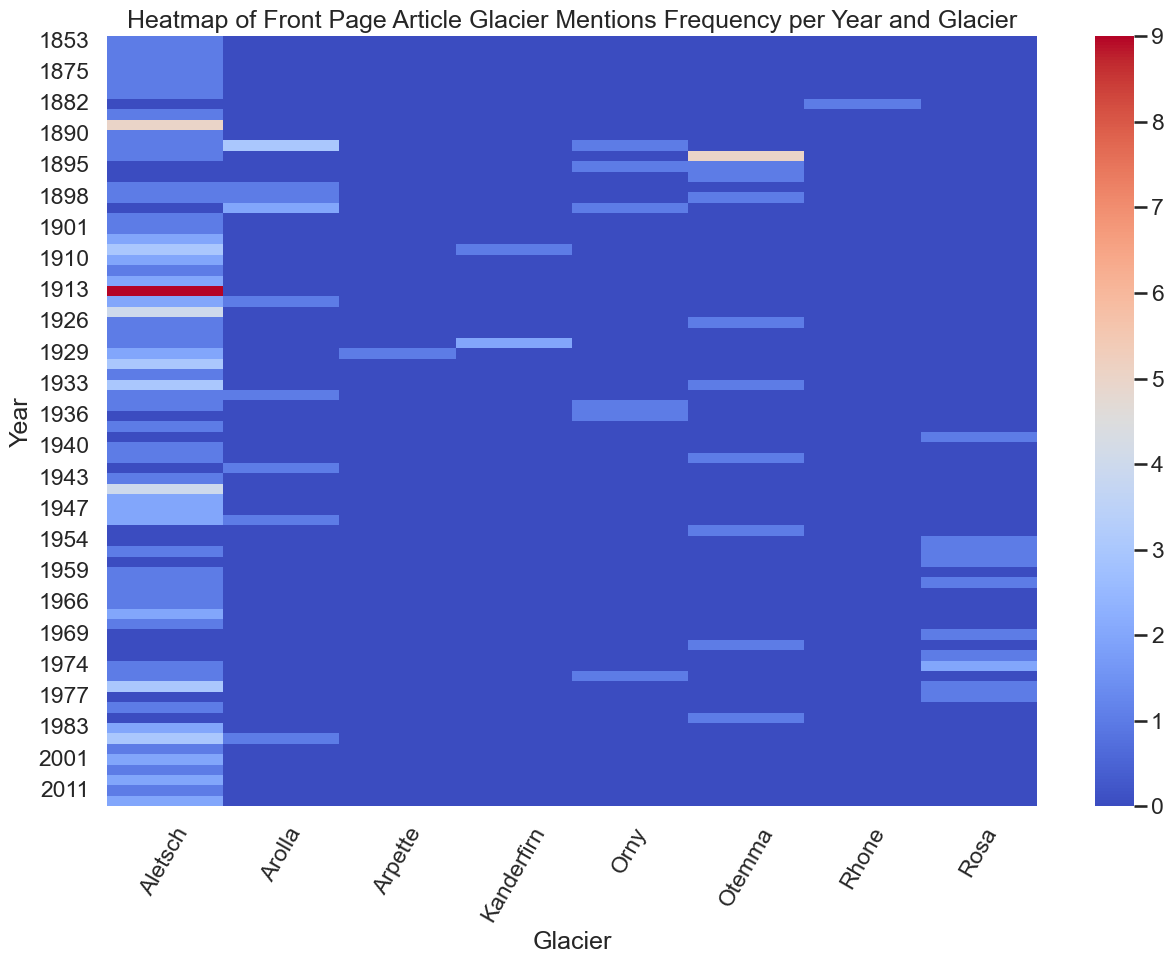

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front'] == True]

# Group by year and glacier, then count occurrences
front_page_article_counts = front_page_articles.groupby(['year', 'glacier']).size().reset_index(name='front_page_count')

# Pivot for heatmap
pivot_data = front_page_article_counts.pivot(index='year', columns='glacier', values='front_page_count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Front Page Article Glacier Mentions Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


### What happened in 1913 to Aletsch Glacier (it was on front page many times)?

In [224]:
# Filter for Aletsch Glacier and front-page articles
aletsch_articles = data[(data['glacier'] == 'Aletsch') & (data['is_on_front'] == True)]

# Find the year(s) with the maximum number of front-page mentions
max_mentions_year = aletsch_articles['year'].value_counts().idxmax()

# Filter articles from that year
max_mentions_articles = aletsch_articles[aletsch_articles['year'] == max_mentions_year]

# Display some articles - you can adjust the number of articles to display
print(max_mentions_articles[['title', 'date', 'content']].head())


                                      title                  date  \
786             £g$ manœuvres à la Jimgjran  1913-09-18T00:00:00Z   
789                           A la Jungfrau  1913-09-20T00:00:00Z   
1063  Une intéressante expérience militaire  1913-09-16T00:00:00Z   
1064             La 9 e brigade de montagne  1913-09-17T00:00:00Z   
1066                        Avant le départ  1913-09-18T00:00:00Z   

                                                content  
786   £ _g $ manœuvres a la _Jimgjran Nous avons dit...  
789   A la Jungfrau Le chemin de fer de la Jungfrau,...  
1063  Une interessante experience militaire Thoune, ...  
1064  La 9 brigade de montagne Thoune, le 15 septemb...  
1066  Avant le depart Thoune, le 16 septembre. (De n...  


In [235]:
for index, row in max_mentions_articles.iterrows():
    print(f"Title: {row['title']}")
    print(f"Date: {row['date']}")
    print(f"Content: {row['content'][:400]}\n")
    print("----------------------------------------------------\n")

Title: £g$ manœuvres à la Jimgjran
Date: 1913-09-18T00:00:00Z
Content: £ _g $ manœuvres a la _Jimgjran Nous avons dit qu'un detachement de 520 hommes-, forme d une compagnie de chacun des bataillons d'infanterie de montagne 34,35,36 et d'une compagnie sanitaire de 70 hommes, 'est arrive, mardi matin, de Thoune a Interlaken pair bateau' special. Il est parti a pied, par Lauterbrunnen et _IWengen, pour la Petite Scheidegg, et de la il devait gagner hier matin par chemi

----------------------------------------------------

Title: A la Jungfrau
Date: 1913-09-20T00:00:00Z
Content: A la Jungfrau Le chemin de fer de la Jungfrau, œuvre unique et prodigieuse, transportera bientot les voyageurs eblouis, a 4167 metres, devant un panorama inoubliable. Au moment ou les ckels de notre armee viennent de conduire 500 hommes de troupes a travers le glacier d'Aletsch, au milieu des neiges eternelles du massif de la Jungfrau, il est particulierement interessant de rappeler avec quelques 

--------------

In [168]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import unicodedata


def remove_accents(input_str):
    # Normalize Unicode characters and then encode to ASCII while ignoring non-spacing marks
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])


# Extract the sentence that contain the name of the glacier
def extract_sentence(content, glacier_name):
    content = remove_accents(content)
    sentences = sent_tokenize(content)
    for sentence in sentences:
        if glacier_name.lower() in sentence.lower():
            return sentence
    return None

# Apply the function to each row in the DataFrame
data['sentence_with_glacier'] = data.progress_apply(lambda row: extract_sentence(row['content'], row['glacier']), axis=1)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [00:01<00:00, 1207.44it/s]


In [170]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique dépêche...   
1        Rhone  dernièresj épêches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fête musiques ouvrières fribourg samedi...   

                               sentence_with_glacier  
0  — Dernierement le domestique du chalet du Rose...  
1  Deux etrangers, un monsieur et une dame, origi...  
0  De la , il a a ses pieds la vallee de Lauterbr...  
0  Auparavant, il fallut s'appuyer encore le dete...  
0  — Trois touristes balois, Adolf Egli, 21 ans, ...

In [171]:
# Remove the accents from the text
data['content'] = data['content'].apply(remove_accents)

In [203]:
data['glacier'].unique()

array(['Rhone', 'Grindelwald', 'Arpette', 'Pers', 'Zmutt', 'Orny',
       'Allalin', 'Aletsch', 'Otemma', 'Morteratsch', 'Kanderfirn',
       'Trient', 'Rosa', 'Zinal', 'Roseg', 'Arolla'], dtype=object)

In [204]:
glacier_locations = {
    "Rhone": "Canton du Valais",
    "Grindelwald": "Canton du Berne",
    'Arpette': "Canton du Valais", 
    'Pers': "Canton du Graubünden", 
    'Zmutt': "Canton du Valais",
    'Orny': "Canton du Valais",
    'Allalin': "Canton du Valais",
    'Aletsch': "Canton du Valais",
    'Otemma': "Canton du Valais", 
    'Morteratsch': "Canton du Graubünden", 
    'Kanderfirn': "Canton du Berne",
    'Trient': "Canton du Valais",
    'Rosa': "Canton du Valais", 
    'Zinal': "Canton du Valais",
    'Roseg': "Canton du Graubünden",  
    'Arolla': "Canton du Valais"
}

data['glacier_location'] = data['glacier'].apply(lambda glacier: glacier_locations[glacier])

In [205]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  ...  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882  ...   
1       JDG  JDG-1902-09-06-a     3         1  1902  ...   
0       LLE  LLE-1893-11-18-a     3         1  1893  ...   
0       IMP  IMP-1929-08-17-a     1         1  1929  ...   
0       IMP  IMP-1935-07-22-a     8         1  1935  ...   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  [SUSSE GEK'EVE, major Hart, Les Arabes, Garnet...   
1  1902-09-06T00:00:00Z  [Fritz Meyer, Ernest Ruch, professeur Hans Wir...   
0  1893-11-18T00:00:00Z                                                 []   
0  1929-08-17T00:00:00Z             [Val Perret, Val Perret, Henri BUHLER]   
0  1935-07-22T00:00:00Z  [M. Gottfried Steffen, M. Gottfried Steffen, M...   

                                 locations_mentioned  \
0  [Graham, Graham, Baker, Russell, Graham, Alexa...   
1  [Suisse, Bienne, Bienne, Metz, Rhône, Lucerne,...   
0  [Chicago, Chicago, France, France, Italie, Jap...   
0        [Cologne, Savoie, Venise, Rialto, Martigny]   
0  [Suisse, Fribourg, Fribourg, Suisse, Bâle, Olt...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities      glacier_location  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...      Canton du Valais  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...      Canton du Valais  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...       Canton du Berne  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...      Canton du Valais  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...  Canton du Graubünden  

[5 rows x 21 columns]

# Preprocessing 

In [ ]:
import spacy
import string
from nltk.corpus import stopwords

spacy.cli.download("fr_core_news_lg")

nlp = spacy.load("fr_core_news_lg") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.fr.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

nltk_stopwords = stopwords.words('french')

spacy_stopwords[:10], punctuation[:10]

In [158]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier  
0        Rhone  
1        Rhone  
0  Grindelwald  
0      Arpette  
0         Pers

In [172]:
from tqdm import tqdm

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# If you're not in a Jupyter environment
tqdm.pandas()

def preprocess(phrase):
    # Convert to lowercase
    phrase = phrase.lower()

    # Remove tokens that are in the stopword list or are punctuation, and strip whitespace/newlines
    tokens = [token.text.replace('\n', '').strip() for token in nlp(phrase) 
              if token.text.lower() not in spacy_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Rejoin tokens and tokenize again (not always necessary, depends on the use case)
    phrase = ' '.join(tokens).lower()
    tokens = [token.replace('\n', '').strip() for token in word_tokenize(phrase) 
              if token.lower() not in nltk_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic again
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Return the preprocessed phrase
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text'] = data['content'].progress_apply(preprocess)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [04:35<00:00,  7.84it/s]


Lemmatisation

Le processus de « [**lemmatisation**](https://fr.wikipedia.org/wiki/Lemmatisation) » consiste à représenter les mots (ou [lemmes](https://fr.wikipedia.org/wiki/Lemme_(linguistique)) en linguistique) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On ne **conserve que le sens des mots** utilisés dans le corpus. 

In [249]:
doc = nlp("Malgré les circonstances, les citoyens étaient déterminés à défendre leurs convictions jusqu'au bout.")

for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', token.lemma_) # Comment obtenir le lemme d'un mot

Word: Malgré 	 Lemma: malgré
Word: les 	 Lemma: le
Word: circonstances 	 Lemma: circonstance
Word: , 	 Lemma: ,
Word: les 	 Lemma: le
Word: citoyens 	 Lemma: citoyen
Word: étaient 	 Lemma: être
Word: déterminés 	 Lemma: déterminer
Word: à 	 Lemma: à
Word: défendre 	 Lemma: défendre
Word: leurs 	 Lemma: leur
Word: convictions 	 Lemma: conviction
Word: jusqu' 	 Lemma: jusque
Word: au 	 Lemma: au
Word: bout 	 Lemma: bout
Word: . 	 Lemma: .


In [248]:
def preprocess_with_lemmatisation(phrase):
    
    phrase = phrase.lower() # minuscule
    
    
    tokens = []
    
    tokens = [token.lemma_.replace('\n', '').strip() for token in nlp(phrase)]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_with_lemmatisation'] = data['cleaned_text'].progress_apply(preprocess_with_lemmatisation)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [02:10<00:00, 16.56it/s]


In [173]:
data['cleaned_text']

0      susse eve septembre bulletin politique depeche...
1      dernieresj epeches suisse berne double suicide...
0      lexposition chicago chicago oclobre architectu...
0      pied lmie notes easra promeneur cliampex comme...
0      suisse fete musiques ouvrieres fribourg samedi...
                             ...                        
129    touristes peri epuisement froid sommet benito ...
130    varietes enfants journal relate lundi recente ...
131    touriste eiger retrouve vivont budget ordinair...
132    resume informations dimanche aout decouvert gl...
133    rsaxxe chute montagne professeur andre guex ma...
Name: cleaned_text, Length: 2156, dtype: object

# Entity detection (+ exploration of existing entities)

In [174]:
data.iloc[0]['content']

'SUSSE GEK\'EVE, 1 " Septembre 1882. BULLETIN POLITIQUE Les depeches officielles du quartier-general et les recits publies par les journaux anglais completent et rectifient sur certains points les premiers renseignements que nous avait transmis le telegraphe sur le combat du 28 aout. L\'attaque de cette position avancee par les Egyptiens a eu plus ou moins le tere d\'une surprise. Evidemment, on n\'at tendait rien de serieux pour ce jour-la. Sir Cfarnet Wolseley etait a Ismailia ; il avait laisse le general Graham aux avant-postes avec deux bataillons et demi et cinq canons. A cinq milles en arriere, a Mahsamah, se trouvait un corps nombreux de cavalerie, sous les ordres du major-general Drury-Lowe. Le lundi matin, des forces considerables se montrerent en avant de la position, dans plusieurs directions. Un detachement d\'infanterie montee, sous le commandement du major Hart, fut envoye pour reconnaitre ces troupes et fouiller les plis de terrain qui servaient a dissimuler leur marche.

In [72]:
# Example on how to extract entities
doc = nlp(data.iloc[0]['content'])
for ent in doc.ents:
        print(ent.text, '---', ent.label_)

SUSSE GEK'EVE --- MISC
Egyptiens --- LOC
Sir Cfàrnet Wolseley --- PER
Ismaïlia --- LOC
général Graham --- PER
Mahsamah --- MISC
Drury-Lowe --- PER
major Hart --- PER
Tell-el-Kébir --- LOC
Bédouins --- LOC
Gassasin --- LOC
général Graham --- PER
général Lowe --- PER
sir Baker Russell --- PER
Drury-Lowe --- PER
Egyptiens --- LOC
Anglais --- LOC
Arabes --- MISC
marche des Anglais --- MISC
Sir Garnet Wolseley --- PER
général Graham --- PER
Gassasin --- PER
Tell-el-Kébir --- LOC
Alexandrie --- LOC
Ismaïlia --- LOC
Ramleh --- LOC
Arabi --- PER
Mameluks --- LOC
Port-Saïd --- LOC
Arabi --- PER
Garnet Wolseley --- PER
Arabes --- MISC
Tell-el-Kébir --- LOC
Caire --- LOC
Arabi --- PER
Alexandrie --- LOC
Egypte --- LOC
Londres --- LOC
Constantinople --- LOC
Lord Dufferin --- PER
Saïd --- PER
Londres --- LOC
Thessalie --- LOC
conférence de Berlin --- MISC
Karalik-Dervend --- LOC
Platamona --- LOC
Thessalie --- LOC
Macédoine --- LOC
Turcs --- LOC
général Grivas --- PER
Thessalie --- LOC
Athènes --- 

In [ ]:
len(data)

In [178]:
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ['LOC', 'ORG']:
            # Keep only entities > 3 characters
            if len(ent.text) > 3:
                if ent.label_ in ['LOC']:
                    if ent.text[0].isupper():
                        # Keep the LOC entities that start with an upper character
                        entities.append((ent.text, ent.label_))
                else:
                    entities.append((ent.text, ent.label_))
    return entities
    
    
data['entities'] = data['content'].progress_apply(extract_entities)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [04:04<00:00,  8.80it/s]


In [179]:
data['entities']

0      [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...
1      [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...
0      [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...
0      [(St-Gingolph, LOC), (Aiguilles Rouges et du M...
0      [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...
                             ...                        
129    [(Internationale ouvriere socialiste, ORG), (A...
130    [(Notre journal, ORG), (Douves Blanches, LOC),...
131    [(Eiger, LOC), (Celles, LOC), (Conseil, ORG), ...
132    [(Val d'Herens, LOC), (Nyon, LOC), (Lausanne, ...
133    [(Gymnase, LOC), (Ouchy, LOC), (Universite, ORG)]
Name: entities, Length: 2156, dtype: object

In [180]:
data.columns

Index(['uid', 'language', 'title', 'size', 'country', 'newspaper', 'issue',
       'pages', 'nb_pages', 'year', 'is_on_front', 'date', 'persons_mentioned',
       'locations_mentioned', 'content', 'filename', 'glacier', 'cleaned_text',
       'sentence_with_glacier', 'entities'],
      dtype='object')

In [181]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...

In [184]:
# Postprocess locations already in the dataframe
data['locations_mentioned'] = data['locations_mentioned'].apply(lambda locations: 
                                                                locations.split('|') if '|' in str(locations) else [])

In [186]:
# Postprocess persons already in the dataframe
data['persons_mentioned'] = data['persons_mentioned'].apply(lambda persons: 
                                                             persons.split('|') if '|' in str(persons) else [])

In [193]:
# Transform all locations: if they are capitalized SUISSE --> Suisse

def postprocess_locations(list_locations):
    return [location[0].upper() + location[1:].lower() for location in list_locations]

data['locations_mentioned'] = data['locations_mentioned'].apply(postprocess_locations)

In [194]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  [SUSSE GEK'EVE, major Hart, Les Arabes, Garnet...   
1  1902-09-06T00:00:00Z  [Fritz Meyer, Ernest Ruch, professeur Hans Wir...   
0  1893-11-18T00:00:00Z                                                 []   
0  1929-08-17T00:00:00Z             [Val Perret, Val Perret, Henri BUHLER]   
0  1935-07-22T00:00:00Z  [M. Gottfried Steffen, M. Gottfried Steffen, M...   

                                 locations_mentioned  \
0  [Graham, Graham, Baker, Russell, Graham, Alexa...   
1  [Suisse, Bienne, Bienne, Metz, Rhône, Lucerne,...   
0  [Chicago, Chicago, France, France, Italie, Jap...   
0        [Cologne, Savoie, Venise, Rialto, Martigny]   
0  [Suisse, Fribourg, Fribourg, Suisse, Bâle, Olt...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...

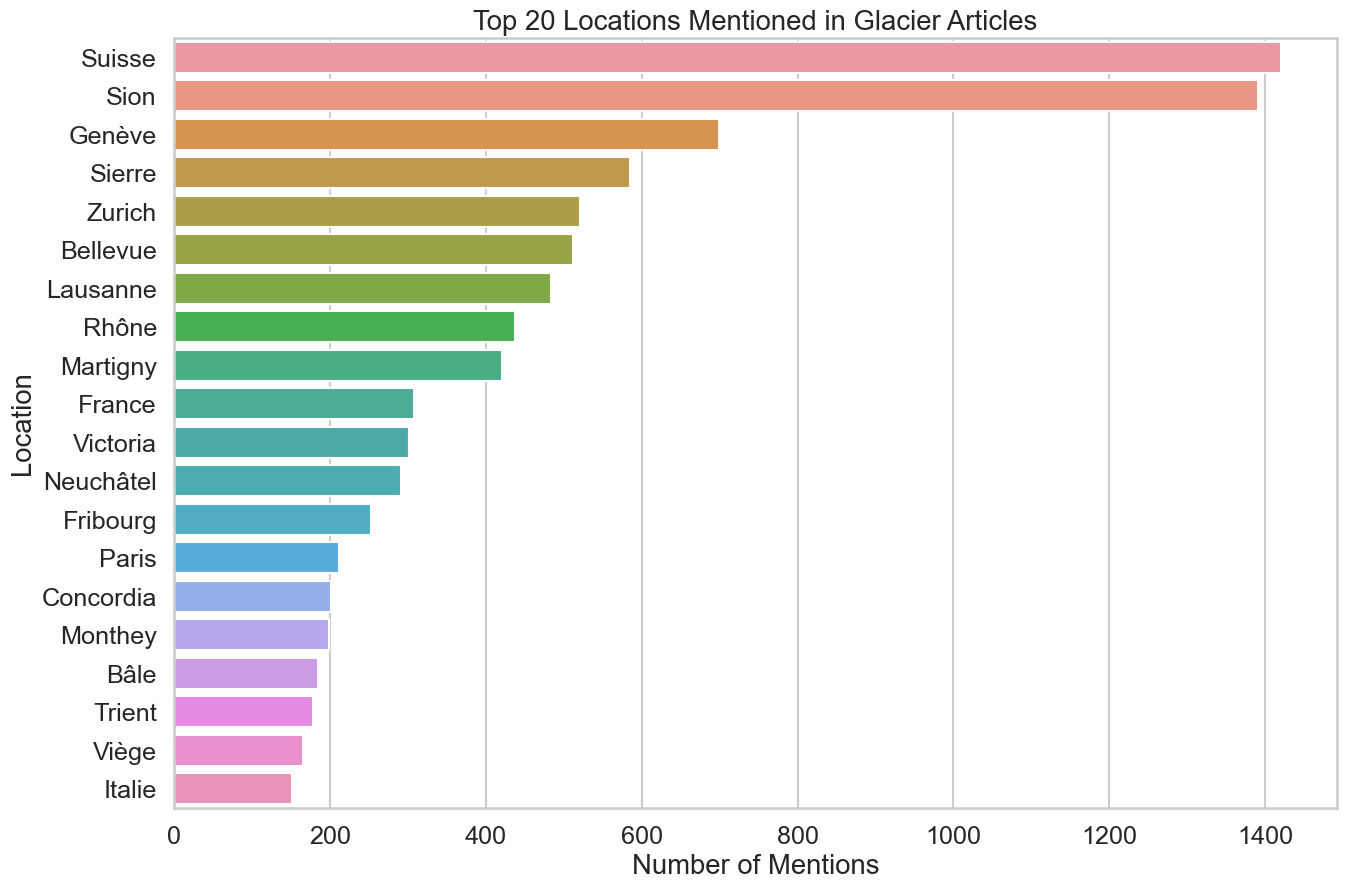

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

sns.set_palette("colorblind")

# Flatten the list of locations_mentioned into a single list
all_locations = [location for sublist in data['locations_mentioned'] for location in sublist]

# Count occurrences of each location
location_counts = Counter(all_locations)

# Convert to DataFrame for easy plotting
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Location', data=location_df.head(20)) # Adjust the number as needed
plt.title('Top 20 Locations Mentioned in Glacier Articles')
plt.xlabel('Number of Mentions')
plt.ylabel('Location')
plt.show()


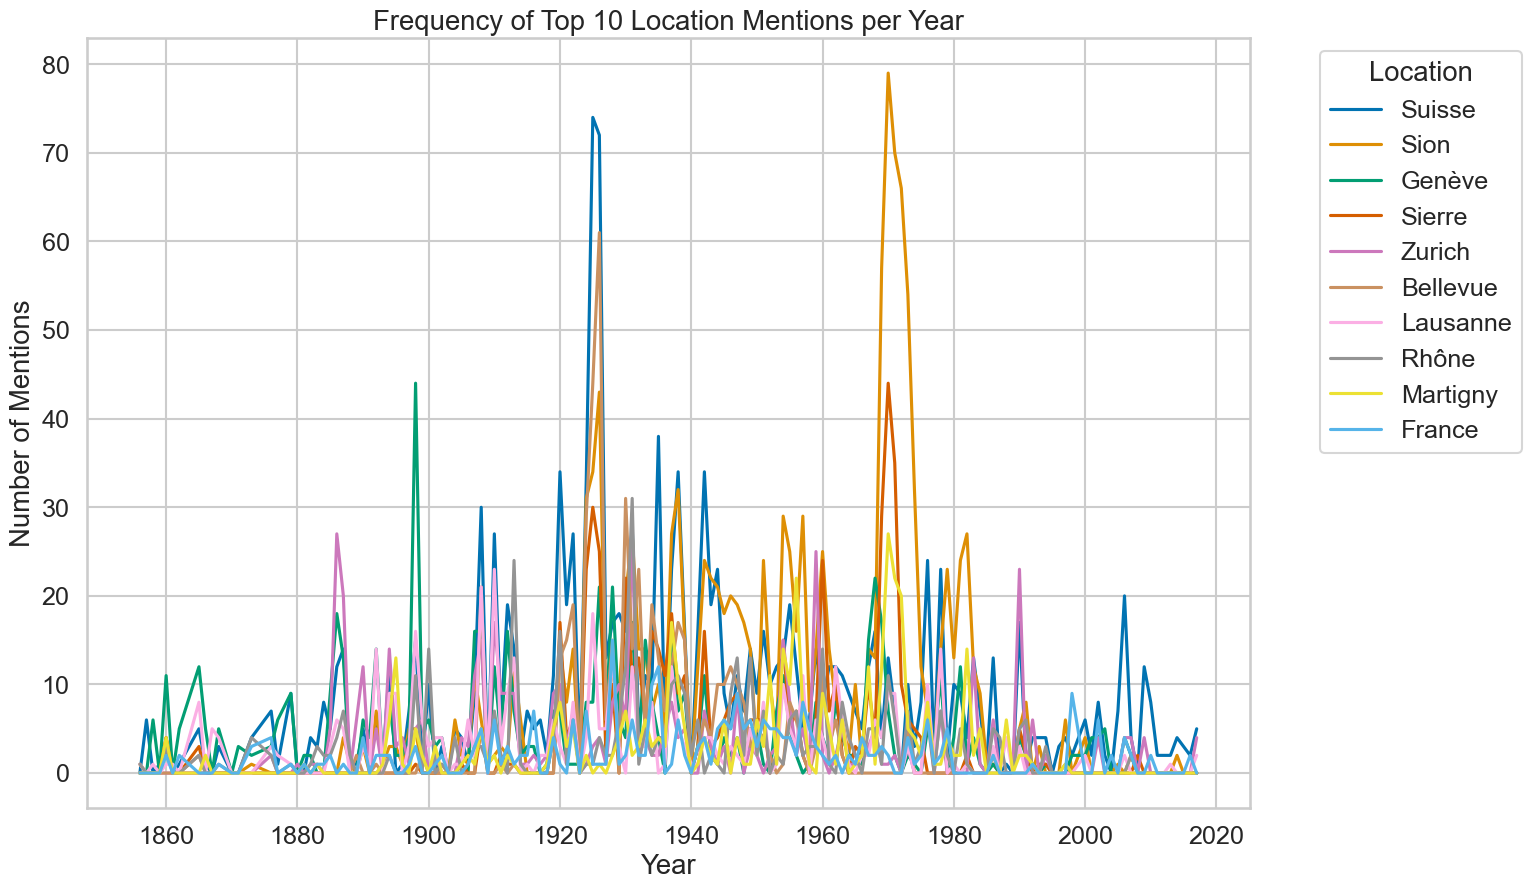

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Expand the 'locations_mentioned' column into a row for each location
locations_expanded = data.explode('locations_mentioned')

# Group by year and location, then count occurrences
location_counts_per_year = locations_expanded.groupby(['year', 'locations_mentioned']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='locations_mentioned', values='count').fillna(0)


# Identify the most common locations (you can adjust the number)
num_top_locations = 10  # For example, top 5 locations
top_locations = pivot_data.sum().sort_values(ascending=False).head(num_top_locations).index

# Plotting only the most common locations
plt.figure(figsize=(15, 10))
for location in top_locations:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title(f'Frequency of Top {num_top_locations} Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


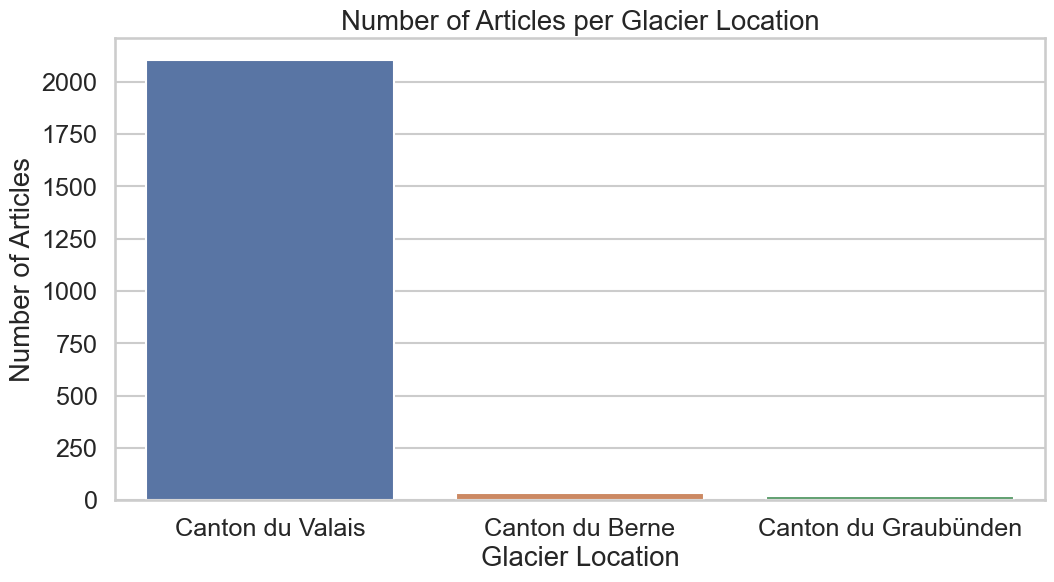

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Count the number of articles per glacier location
glacier_location_counts = data['glacier_location'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=glacier_location_counts.index, y=glacier_location_counts.values)
plt.xlabel('Glacier Location')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Glacier Location')
plt.xticks(rotation=0)
plt.show()


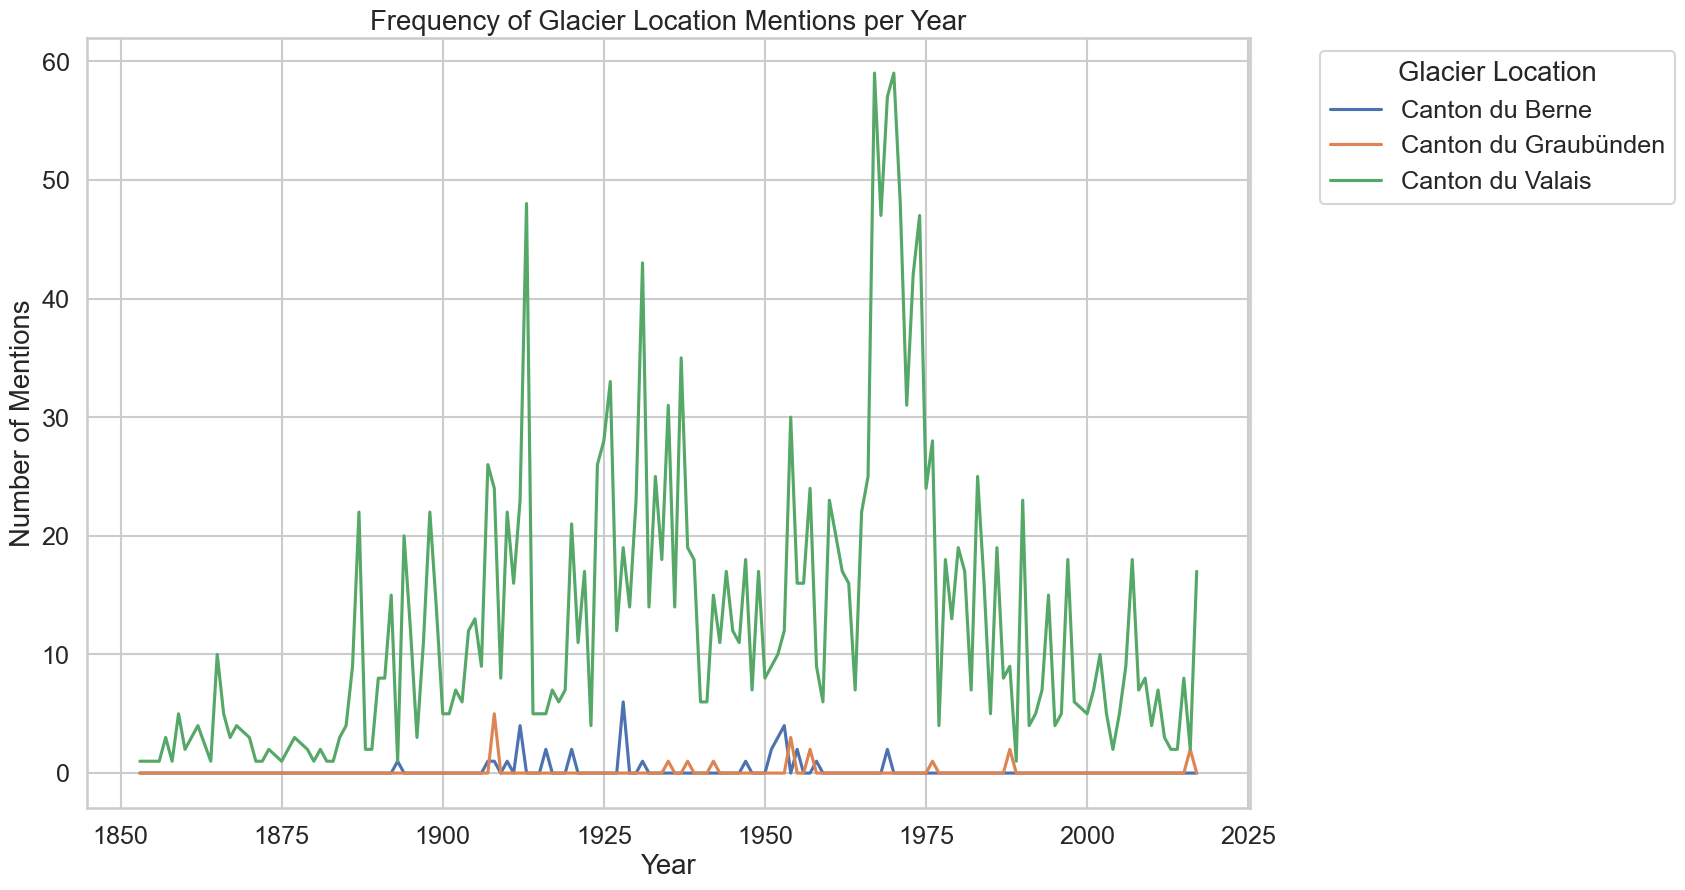

In [214]:
# Group by year and glacier location, then count occurrences
location_counts_per_year = data.groupby(['year', 'glacier_location']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='glacier_location', values='count').fillna(0)

# Plotting - you can adjust the number of glacier locations to display
plt.figure(figsize=(15, 10))
for location in pivot_data.columns:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title('Frequency of Glacier Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Glacier Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [31]:
#!pip install keybert
#!pip install flair

In [ ]:
# kw_model = KeyBERT()
# keywords = kw_model.extract_keywords(doc)

In [76]:
# from keybert import KeyBERT
# from flair.embeddings import TransformerDocumentEmbeddings

# roberta = TransformerDocumentEmbeddings('camembert-base')
# kw_model = KeyBERT(model=roberta)

In [45]:
# data['cleaned_text'].iloc[0]

In [77]:
# kw_model.extract_keywords(data['content'].iloc[0], keyphrase_ngram_range=(3, 3), use_mmr=True, diversity=0.7)

## Topic detection

In [250]:
from bertopic import BERTopic

desired_number_of_topics = 20

topic_model = BERTopic(language="french", calculate_probabilities=True, verbose=True,
                       nr_topics=desired_number_of_topics)

topics, probs = topic_model.fit_transform(data["cleaned_text_with_lemmatisation"])

Batches:   0%|          | 0/68 [00:00<?, ?it/s]

2023-11-17 14:31:41,956 - BERTopic - Transformed documents to Embeddings
2023-11-17 14:31:45,727 - BERTopic - Reduced dimensionality
2023-11-17 14:31:45,890 - BERTopic - Clustered reduced embeddings
2023-11-17 14:31:47,188 - BERTopic - Reduced number of topics from 48 to 20


In [251]:
topic_model.get_topic_info()

Topic  Count                                     Name  \
0      -1    717              -1_glacier_ete_suisse_grand   
1       0    274                   0_ete_faire_grand_bien   
2       1    245                   1_ski_hiver_sport_pied   
3       2    184              2_ete_conseil_federal_faire   
4       3    107             3_ete_guide_accident_victime   
5       4    101         4_hotel_pension_ideal_prospectus   
6       5     88           5_hotel_pension_lit_prospectus   
7       6     73               6_hotel_pension_cafe_grand   
8       7     69              7_glacier_glace_metre_recul   
9       8     66              8_pilote_avion_appareil_ete   
10      9     38         9_glacier_avs_aletsch_bettmeralp   
11     10     30              10_eglise_frere_anglais_alt   
12     11     29                11_zone_tir_mercredi_arme   
13     12     25      12_equipe_entrainement_champion_min   
14     13     25       13_altitude_riederalp_metre_furker   
15     14     21         14_protection_nature_ligue_foret   
16     15     17             15_eau_usine_million_energie   
17     16     16     16_janvier_situation_hotel_reduction   
18     17     16             17_record_vitesse_ski_casser   
19     18     15  18_professeur_mercanton_science_naturel   

                                       Representation  \
0   [glacier, ete, suisse, grand, hotel, aletsch, ...   
1   [ete, faire, grand, bien, glacier, heure, jour...   
2   [ski, hiver, sport, pied, zermatt, tourism, of...   
3   [ete, conseil, federal, faire, suisse, etat, c...   
4   [ete, guide, accident, victime, glacier, mort,...   
5   [hotel, pension, ideal, prospectus, sejour, st...   
6   [hotel, pension, lit, prospectus, tennis, pros...   
7   [hotel, pension, cafe, grand, dep, bain, resta...   
8   [glacier, glace, metre, recul, rechauffement, ...   
9   [pilote, avion, appareil, ete, aviation, vol, ...   
10  [glacier, avs, aletsch, bettmeralp, dep, siecl...   
11  [eglise, frere, anglais, alt, fois, post, tele...   
12  [zone, tir, mercredi, arme, jeudi, mardi, grav...   
13  [equipe, entrainement, champion, min, sec, aut...   
14  [altitude, riederalp, metre, furker, juin, dom...   
15  [protection, nature, ligue, foret, national, l...   
16  [eau, usine, million, energie, bassin, projet,...   
17  [janvier, situation, hotel, reduction, maison,...   
18  [record, vitesse, ski, casser, monde, italien,...   
19  [professeur, mercanton, science, naturel, soci...   

                                  Representative_Docs  
0   [feeri aerienne alpes fetes commemorative schi...  
1   [semaine chargee descendre flatiere houche tro...  
2   [zermatt pied cervin saa fee perle alpes graec...  
3   [confederation suisse conseil nati oher seance...  
4   [alpe valaisan mort jour montagne personne per...  
5   [vacance region beau chemin fer furha oberalp ...  
6   [pied dent midi dent blanc ligne simplon chemi...  
7   [berne iterur hotel bellevue hotel ruof hotel ...  
8   [climat helvetie glacier fondre glacier aletsc...  
9   [confederation accident aviation aletsch enqne...  
10  [unesco glacier escalier climat cle mythe conc...  
11  [hotel pension bel alp alt station briguer nat...  
12  [avis tir tir munition date lieu lieu jeudi ve...  
13  [skieur alpin entrainer methode lievr applique...  
14  [koctlsborm hoteldelajungfrau altitude metre j...  
15  [foret aletsch monument national tfc communiqu...  
16  [projet barrage usine electrique etudie servic...  
17  [bettmeralp hotel woldhaus hotel montagn confo...  
18  [record mondial battre cervinia italien casser...  
19  [science naturel derniere seance vacance socie...

climate change: 7_glacier_glace_metre_recul 	[glacier, glace, metre, recul, rechauffement, ... 	[climat helvetie glacier fondre glacier aletsc...

In [252]:
topic_names = topic_model.topic_labels_

In [253]:
len(data)

2156

In [254]:
topic_names

{-1: '-1_glacier_ete_suisse_grand',
 0: '0_ete_faire_grand_bien',
 1: '1_ski_hiver_sport_pied',
 2: '2_ete_conseil_federal_faire',
 3: '3_ete_guide_accident_victime',
 4: '4_hotel_pension_ideal_prospectus',
 5: '5_hotel_pension_lit_prospectus',
 6: '6_hotel_pension_cafe_grand',
 7: '7_glacier_glace_metre_recul',
 8: '8_pilote_avion_appareil_ete',
 9: '9_glacier_avs_aletsch_bettmeralp',
 10: '10_eglise_frere_anglais_alt',
 11: '11_zone_tir_mercredi_arme',
 12: '12_equipe_entrainement_champion_min',
 13: '13_altitude_riederalp_metre_furker',
 14: '14_protection_nature_ligue_foret',
 15: '15_eau_usine_million_energie',
 16: '16_janvier_situation_hotel_reduction',
 17: '17_record_vitesse_ski_casser',
 18: '18_professeur_mercanton_science_naturel'}

Tentative of naming the topics:

* -1 --
* 0 Holiday Events
* 1 Sport Events
* 2 Holiday Events
* 3 Accidents
* 4 Hotels & Tourism
* 5 Hotels & Tourism
* 6 Hotels & Tourism
* 7 Climate Change
* 8 Accidents
* 9 ?
* 10 War Events
* 11 War Events
* 12 Sport Events
* 13 Glacier Measures
* 14 ?
* 15 ?
* 16 Hotels & Tourism
* 17 Constructions
* 18 Sport Events
* 19 ?

In [256]:
# Add topic names to the DataFrame
data['topics'] = topics

data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  ...  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882  ...   
1       JDG  JDG-1902-09-06-a     3         1  1902  ...   
0       LLE  LLE-1893-11-18-a     3         1  1893  ...   
0       IMP  IMP-1929-08-17-a     1         1  1929  ...   
0       IMP  IMP-1935-07-22-a     8         1  1935  ...   

                                 locations_mentioned  \
0  [Graham, Graham, Baker, Russell, Graham, Alexa...   
1  [Suisse, Bienne, Bienne, Metz, Rhône, Lucerne,...   
0  [Chicago, Chicago, France, France, Italie, Jap...   
0        [Cologne, Savoie, Venise, Rialto, Martigny]   
0  [Suisse, Fribourg, Fribourg, Suisse, Bâle, Olt...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities      glacier_location  \
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...      Canton du Valais   
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...      Canton du Valais   
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...       Canton du Berne   
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...      Canton du Valais   
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...  Canton du Graubünden   

                     cleaned_text_with_lemmatisation topics  
0  suss eve septembre bulletin politique depecher...      0  
1  dernieresj epecher suisse bern double suicide ...      3  
0  lexposition chicago chicago oclobr architectur...      0  
0  pied lmi note easra promeneur cliampex commenc...     -1  
0  suisse fete musique ouvriere fribourg samedi d...      0  

[5 rows x 23 columns]

In [258]:
TOPIC_NAMES = {
    -1: "No topic",
    0: "Holiday Events",
    1: "Sport Events",
    2: "Holiday Events",
    3: "Accidents",
    4: "Hotels & Tourism",
    5: "Hotels & Tourism",
    6: "Hotels & Tourism",
    7: "Climate Change",
    8: "Accidents",
    9: "?", # I don't know yet: you need to check all of them
    10: "War Events",
    11: "War Events",
    12: "Sport Events",
    13: "Glacier Measures",
    14: "?", # I don't know yet: you need to check all of them
    15: "?", # I don't know yet: you need to check all of them
    16: "Hotels & Tourism",
    17: "Constructions",
    18: "Sport Events",
    19: "?" # I don't know yet: you need to check all of them
}

In [259]:
data['topic_name'] = data['topics'].apply(lambda topic: TOPIC_NAMES[topic])

In [260]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  ...  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882  ...   
1       JDG  JDG-1902-09-06-a     3         1  1902  ...   
0       LLE  LLE-1893-11-18-a     3         1  1893  ...   
0       IMP  IMP-1929-08-17-a     1         1  1929  ...   
0       IMP  IMP-1935-07-22-a     8         1  1935  ...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities      glacier_location  \
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...      Canton du Valais   
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...      Canton du Valais   
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...       Canton du Berne   
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...      Canton du Valais   
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...  Canton du Graubünden   

                     cleaned_text_with_lemmatisation topics      topic_name  
0  suss eve septembre bulletin politique depecher...      0  Holiday Events  
1  dernieresj epecher suisse bern double suicide ...      3       Accidents  
0  lexposition chicago chicago oclobr architectur...      0  Holiday Events  
0  pied lmi note easra promeneur cliampex commenc...     -1        No topic  
0  suisse fete musique ouvriere fribourg samedi d...      0  Holiday Events  

[5 rows x 24 columns]

In [266]:
data.to_csv('final_data.csv')

In [261]:
# Remove the noise

filtered_data = data[data['topics'] != -1]

In [267]:
filtered_data.to_csv('final_filtered_data.csv')

In [262]:
len(filtered_data)

1439

In [263]:
filtered_data.head()

uid language                         title  size  \
0  JDG-1882-09-01-a-i0001       fr                         SUSSE  4435   
1  JDG-1902-09-06-a-i0042       fr            DERNIÈRESJ1ÉPÊCHES   593   
0  LLE-1893-11-18-a-i0007       fr       L'EXPOSITION DE CHICAGO  1379   
0  IMP-1935-07-22-a-i0090       fr                     Çn Suisse   605   
2  LSE-1957-07-02-a-i0040       fr  La famine en Chine populaire  1658   

  country newspaper             issue pages  nb_pages  year  ...  \
0      CH       JDG  JDG-1882-09-01-a   1,2         2  1882  ...   
1      CH       JDG  JDG-1902-09-06-a     3         1  1902  ...   
0      CH       LLE  LLE-1893-11-18-a     3         1  1893  ...   
0      CH       IMP  IMP-1935-07-22-a     8         1  1935  ...   
2      CH       LSE  LSE-1957-07-02-a     8         1  1957  ...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   
2  La famine en Chine populaire is ?^ ^, Un verti...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   
2         Pers  famine chine populaire vertidble miracle permi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   
2  Les deux guides prirent aussitot les securites...   

                                            entities      glacier_location  \
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...      Canton du Valais   
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...      Canton du Valais   
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...       Canton du Berne   
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...  Canton du Graubünden   
2  [(Chine, LOC), (Diavolezza, LOC), (Haute-Itali...  Canton du Graubünden   

                     cleaned_text_with_lemmatisation topics      topic_name  
0  suss eve septembre bulletin politique depecher...      0  Holiday Events  
1  dernieresj epecher suisse bern double suicide ...      3       Accidents  
0  lexposition chicago chicago oclobr architectur...      0  Holiday Events  
0  suisse fete musique ouvriere fribourg samedi d...      0  Holiday Events  
2  famine chine populaire vertidbl miracle permet...      3       Accidents  

[5 rows x 24 columns]

In [264]:
topics_over_time = topic_model.topics_over_time(data["cleaned_text_with_lemmatisation"], data.year.to_list(), nr_bins=20)

20it [00:03,  5.19it/s]


In [265]:
topics_over_time

Topic                                           Words  Frequency  \
0       -1  eggishorn, glacier, sommite, jungfrau, aletsch         11   
1        0                   gex, pays, quete, suisse, ete          1   
2        2   savoir, eggischhorn, faire, nettete, ridicule          1   
3        6         hotel, lieue, brigue, meridional, jouir          1   
4        7     glace, glacier, alelsch, eggischhorn, point          1   
..     ...                                             ...        ...   
196      0            cedric, valsorey, cas, suisse, grand         12   
197      2                   zero, merz, otage, libye, uno          4   
198      3     identifier, boval, alpinist, grison, cabane          2   
199      7     glacier, rechauffement, glace, fonte, annee         14   
200      9   unesco, escalier, concordia, glacier, aletsch          7   

     Timestamp  
0     1852.836  
1     1852.836  
2     1852.836  
3     1852.836  
4     1852.836  
..         ...  
196   2008.800  
197   2008.800  
198   2008.800  
199   2008.800  
200   2008.800  

[201 rows x 4 columns]

In [268]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [270]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[7])

In [271]:
# keywords = ['réchauffement', 'réchauffe', 'climatique', 'glacier','glacière', 'météo','calotte glaciaire', 'érosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
# 'dégel','permafrost','géomorphologie','dérèglement','vague de chaleur','gaz à effet de serre','masse glaciaire']

In [272]:
# from nltk.tokenize import word_tokenize
# from functools import partial

# def get_frequency(phrase, keyword):
    
#     return phrase.count(keyword)

# def get_total(phrase):
#     total = 0
#     for keyword in keywords:
#         total += phrase.count(keyword)
#     return total

# for keyword in keywords: 
#     data[keyword] = data['cleaned_text'].progress_apply(partial(get_frequency, keyword))

# data['total'] = data['cleaned_text'].progress_apply(get_total)

In [33]:
from nltk.tokenize import sent_tokenize

unique_sentences = set()

#premère ligne à vérifier 
for text in new_data['content']:
    for sent in sent_tokenize(text):
    #for sent in sent_tokenize(new_data['text'].loc[86405]):
        for keyword in keywords:
            if keyword in sent:
                if sent not in unique_sentences:
                    print(keyword, '----------', sent)
                    print()
                    unique_sentences.add(sent)
                break
                #print(keyword, '----------', sent)
                #print()

glacier ---------- — Dernièrement le domestique du chalet du Rosenlaui, nommé K. Schlœppi, âgé de 80 ans, avait voulu accompagner, avec un autre guide, une famille anglaise au glacier dû Rhône ; la nuit se passa à l'auberge de Guttannen (route du Griinsel), et le matin il se portait parfaitement bien ; mais à deux lieues de là, au moment où la caravane arrivait à la Handeck, Schlaippi, qui conduisait le cheval d'une dame, tomba mort subitement sur le chemin.

glacier ---------- Deux étrangers, un monsieur et une dame, originaires de Metz, yenant du glacier dû Rhône, étaient arrivés à Glùringen, petit village situé près de Munster.

glacier ---------- De là , il a à ses pieds la vallée de Lauterbrunnen , avec la cascade du Giesbach , le village deMiiren ; Îrais vient la réunion dos deux Lutschinen , e lac de Thoune et les admirables séjours de Beatenberg , où était autrefois la grotte de Saint-Béat , une vue des montagnes lucernoises et du Jura ; le spectateur voit ensuite à ses pieds u

In [34]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

sid = SentimentIntensityAnalyzer()

pos = neg = neu = cumul_pos = cumul_neg = cumul_neu = 0

for text in new_data['content']:
    for sent in sent_tokenize(text):
        sentiment_scores = sid.polarity_scores(sent)  
        compound_score = sentiment_scores["compound"]

        for keyword in keywords:
            if keyword in sent:
                print(keyword, '----------', sent)

                if compound_score >= 0.05:
                    sentiment = "Positive"
                    pos += 1
                elif compound_score <= -0.05:
                    sentiment = "Negative"
                    neg += 1
                else:
                    sentiment = "Neutral"
                    neu += 1
                
                print(f"Sentiment: {sentiment}")
                print(keyword)
                print('Positive', pos)
                print('Negative',neg)
                print('Neutral',neu)
        cumul_pos+=pos
        cumul_neg+=neg
        cumul_neu+=neu

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valentin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


glacier ---------- — Dernièrement le domestique du chalet du Rosenlaui, nommé K. Schlœppi, âgé de 80 ans, avait voulu accompagner, avec un autre guide, une famille anglaise au glacier dû Rhône ; la nuit se passa à l'auberge de Guttannen (route du Griinsel), et le matin il se portait parfaitement bien ; mais à deux lieues de là, au moment où la caravane arrivait à la Handeck, Schlaippi, qui conduisait le cheval d'une dame, tomba mort subitement sur le chemin.
Sentiment: Neutral
glacier
Positive 0
Negative 0
Neutral 1
glacier ---------- Deux étrangers, un monsieur et une dame, originaires de Metz, yenant du glacier dû Rhône, étaient arrivés à Glùringen, petit village situé près de Munster.
Sentiment: Neutral
glacier
Positive 0
Negative 0
Neutral 2
glacier ---------- De là , il a à ses pieds la vallée de Lauterbrunnen , avec la cascade du Giesbach , le village deMiiren ; Îrais vient la réunion dos deux Lutschinen , e lac de Thoune et les admirables séjours de Beatenberg , où était autrefo

In [35]:
total = cumul_pos+cumul_neg+cumul_neu
print('Positive:', cumul_pos, 'In percentage:',cumul_pos/total*100)
print('Negative:',cumul_neg, 'In percentage:',cumul_neg/total*100)
print('Neutral:',cumul_neu, 'In percentage:',cumul_neu/total*100)

Positive: 36484592 In percentage: 15.339725684545384
Negative: 20484827 In percentage: 8.61272141608076
Neutral: 180874417 In percentage: 76.04755289937385


In [36]:
data.total.describe()

count    2156.000000
mean        2.655844
std         3.551323
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        71.000000
Name: total, dtype: float64

In [37]:
data['cleaned_text'].isnull().sum()

0

In [38]:
data.dropna(subset=['cleaned_text'], inplace=True)

In [39]:
import numpy as np

list_a = [1, 1, 1, 1, 1]
list_b = [2, 2, 2, 2, 2]

np.hstack([list_a, list_b]) # Exemple de fonctionnement de cette méthode avec des listes

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [40]:
freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data['cleaned_text']]))

In [41]:
for word in ['climat', 'réchauffement', 'réchauffe', 'climatique', 'glacier', 'glaciers','glacière', 'météo',
'fonte','calotte glaciaire', 'érosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
'dégel','permafrost','géomorphologie','dérèglement','vague de chaleur','gaz à effet de serre','masse glaciaire']:
    print(word, ':', freq[word])

climat : 250
réchauffement : 105
réchauffe : 6
climatique : 184
glacier : 4187
glaciers : 753
glacière : 9
météo : 18
fonte : 99
calotte glaciaire : 0
érosion : 8
alpinisme : 117
niveau de la mer : 0
banquise : 0
inlandsis : 3
iceberg : 2
dégel : 2
permafrost : 4
géomorphologie : 2
dérèglement : 2
vague de chaleur : 0
gaz à effet de serre : 0
masse glaciaire : 0


In [42]:
for word in ['a neuve', 'aletsch', 'allalin', 'arolla', 'arpette', 'berons', 'cervin', 'corbassière', 'darrey',
'dolent', 'evole', 'fee', 'ferpècle', 'fiesch', 'findelen', 'finsteraar', 'forno', 'gauli', 'giesen',
'gorner', 'grands', 'giétro', 'inférieur grindelwald', 'supérieur grindelwald', 'grindelwald', 'kanderfirn', 'lang',
'lauteraar', 'martinets', 'moiry', 'moming', 'mont-miné', 'morteratsch', 'oberaar', 'orny', 'otemma',
'palü', 'pers', 'petoudes', 'plaine morte', 'planereuses', 'plines', 'ravines rousses', 'rhône', 'ried',
'plateau rosa', 'roseg', 'saleinaz', 'silvretta', 'théodule', 'tourtemagne', 'treutsebo', 'trient',
'trift (gadmen)', 'tsanfleuron', 'tschierva', 'unteraar', 'zinal', 'zmutt']:
        print(word, ':', freq[word])

a neuve : 0
aletsch : 2451
allalin : 48
arolla : 606
arpette : 14
berons : 0
cervin : 564
corbassière : 11
darrey : 0
dolent : 3
evole : 1
fee : 369
ferpècle : 135
fiesch : 338
findelen : 8
finsteraar : 0
forno : 0
gauli : 2
giesen : 0
gorner : 35
grands : 273
giétro : 0
inférieur grindelwald : 0
supérieur grindelwald : 0
grindelwald : 133
kanderfirn : 38
lang : 17
lauteraar : 0
martinets : 0
moiry : 41
moming : 5
mont-miné : 4
morteratsch : 14
oberaar : 3
orny : 270
otemma : 143
palü : 0
pers : 21
petoudes : 0
plaine morte : 0
planereuses : 0
plines : 2
ravines rousses : 0
rhône : 458
ried : 63
plateau rosa : 0
roseg : 8
saleinaz : 68
silvretta : 11
théodule : 34
tourtemagne : 128
treutsebo : 0
trient : 213
trift (gadmen) : 0
tsanfleuron : 5
tschierva : 1
unteraar : 9
zinal : 179
zmutt : 16


In [43]:
print(freq.most_common(25))

[('hôtel', 6374), ('glacier', 4187), ('tél', 2703), ('grand', 2689), ('suisse', 2542), ('aletsch', 2451), ('pension', 2176), ('hotel', 2030), ('hôtels', 1814), ('station', 1764), ('alpes', 1727), ('prix', 1641), ('mètres', 1622), ('sion', 1615), ('valais', 1604), ('centre', 1528), ('prospectus', 1510), ('montagne', 1501), ('zermatt', 1474), ('route', 1470), ('bien', 1415), ('lac', 1347), ('ans', 1295), ('jusqu', 1288), ('fer', 1254)]


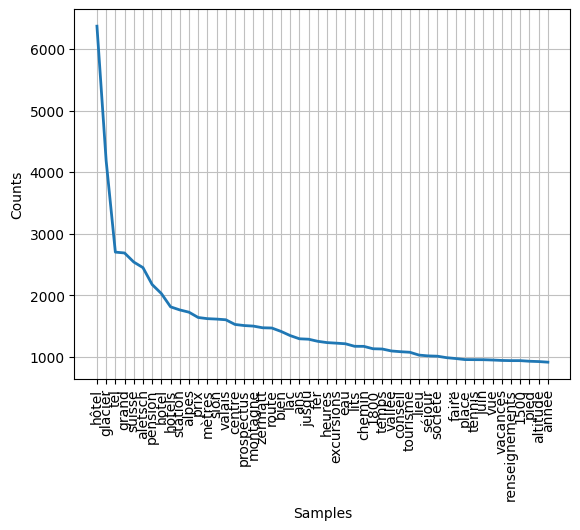

In [44]:
_ = freq.plot(50, cumulative=False)

In [82]:
import nltk
import numpy as np

yearly_freq_dict = {}

for year in sorted(data['year'].unique()):
    data_year = data[data['year'] == year]['cleaned_text']
    
    freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data_year]))
    
    yearly_freq_dict[year] = freq.most_common(5)

for year, freq_dist in yearly_freq_dict.items():
    print(f"Year: {year}, Frequency Distribution: {freq_dist}")

Year: 1853, Frequency Distribution: [('glacier', 5), ('glace', 5), ('point', 4), ('bien', 3), ('tel', 2)]
Year: 1856, Frequency Distribution: [('plus', 11), ('sans', 8), ('quelques', 6), ('aussi', 6), ('savons', 5)]
Year: 1857, Frequency Distribution: [('plus', 20), ('jungfrau', 14), ("l'eggishorn", 13), ('glacier', 12), ('depuis', 9)]
Year: 1858, Frequency Distribution: [('genève', 6), ('fazy', 5), ("l'on", 4), ('depuis', 3), ('chemin', 3)]
Year: 1859, Frequency Distribution: [('hotel', 5), ('valais', 5), ('suisse', 5), ('fera', 5), ('efforts', 5)]
Year: 1860, Frequency Distribution: [('genève', 12), ('cette', 10), ('pays', 10), ('...', 10), ('gex', 8)]
Year: 1861, Frequency Distribution: [('grand', 9), ('glacier', 9), ('brigue', 8), ('soussigné', 6), ("qu'il", 6)]
Year: 1862, Frequency Distribution: [('capitaine', 15), ('cette', 14), ('heures', 14), ('plus', 12), ('jungfrau', 12)]
Year: 1864, Frequency Distribution: [('chalet', 1), ('glacier', 1), ("d'âletsch", 1), ('riederalp', 1), 